In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
data = pd.read_csv(r'C:\Users\My PC\Desktop\Assignment\Assignment\Assignment 5\50_Startups.csv')

In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


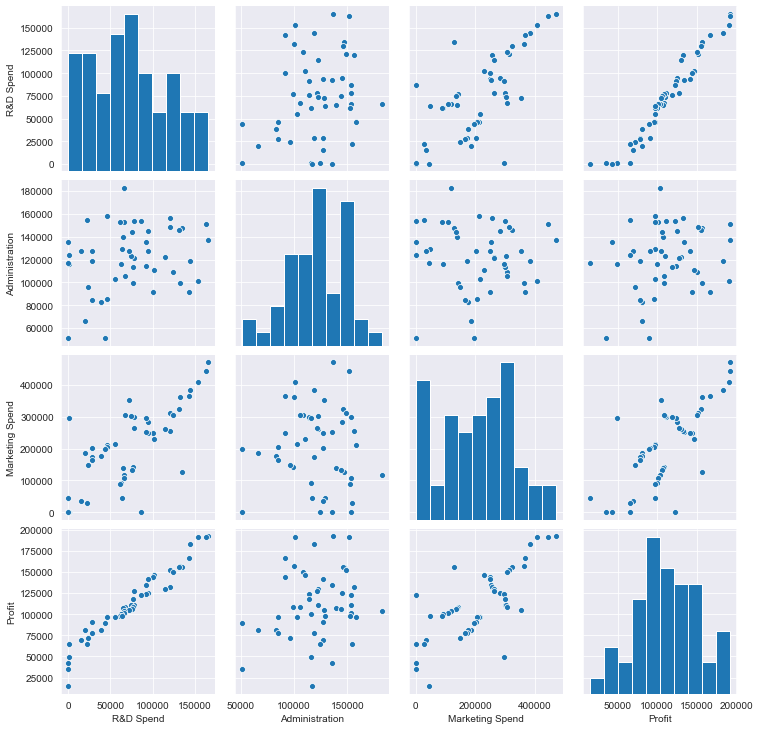

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

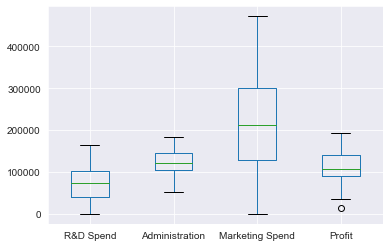

In [13]:
data.boxplot()

In [14]:
data[data.duplicated()].shape

(0, 5)

In [15]:
data.shape

(50, 5)

In [17]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data1 = data.rename({'R&D Spend': 'RD','Marketing Spend': 'M_S','Administration':'Adm'}, axis=1)

In [22]:
data1.head()

,RD,Adm,M_S,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
import statsmodels.formula.api as smf
model = smf.ols("Profit~RD+Adm+M_S",data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.53e-30
Time:                        09:36:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_S            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
ml_Adm = smf.ols("Profit~Adm",data = data1).fit()
ml_Adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 23 Apr 2021   Prob (F-statistic):              0.162
Time:                        09:51:31   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Adm            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
ml_ms = smf.ols("Profit~M_S",data = data1).fit()
ml_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.38e-10
Time:                        09:53:00   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
M_S            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
m_l = smf.ols("Profit~Adm+M_S",data = data1).fit()
m_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           2.50e-10
Time:                        09:53:16   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Adm            0.3237      0.131      2.468      0.017       0.060       0.588
M_S            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model.params

Intercept    50122.192990
RD               0.805715
Adm             -0.026816
M_S              0.027228
dtype: float64

In [25]:
print(model.tvalues, '\n', model.pvalues)    

Intercept     7.626218
RD           17.846374
Adm          -0.525507
M_S           1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
Adm          6.017551e-01
M_S          1.047168e-01
dtype: float64


In [26]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [5]:
data1.head()

,RD,Adm,M_S,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
rsq_RD = smf.ols('RD~Adm+M_S',data=data1).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 

rsq_Adm = smf.ols('Adm~RD+M_S',data=data1).fit().rsquared  
vif_Adm = 1/(1-rsq_Adm) 

rsq_M_S = smf.ols('M_S~RD+Adm',data=data1).fit().rsquared  
vif_M_S = 1/(1-rsq_M_S)


# Storing vif values in a data frame
d1 = {'Variables':['RD','Adm','M_S'],'VIF':[vif_RD,vif_Adm,vif_M_S]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,Adm,1.175091
2,M_S,2.326773


In [14]:
res = model.resid
res

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

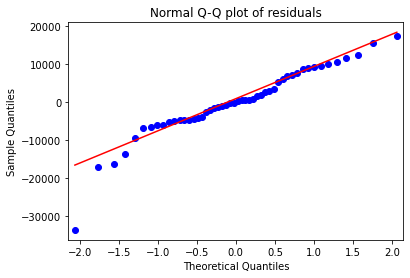

In [15]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [23]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

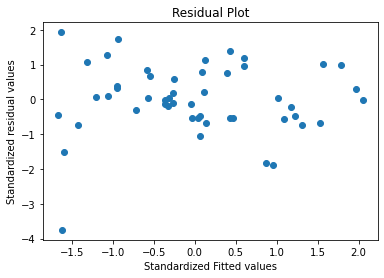

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

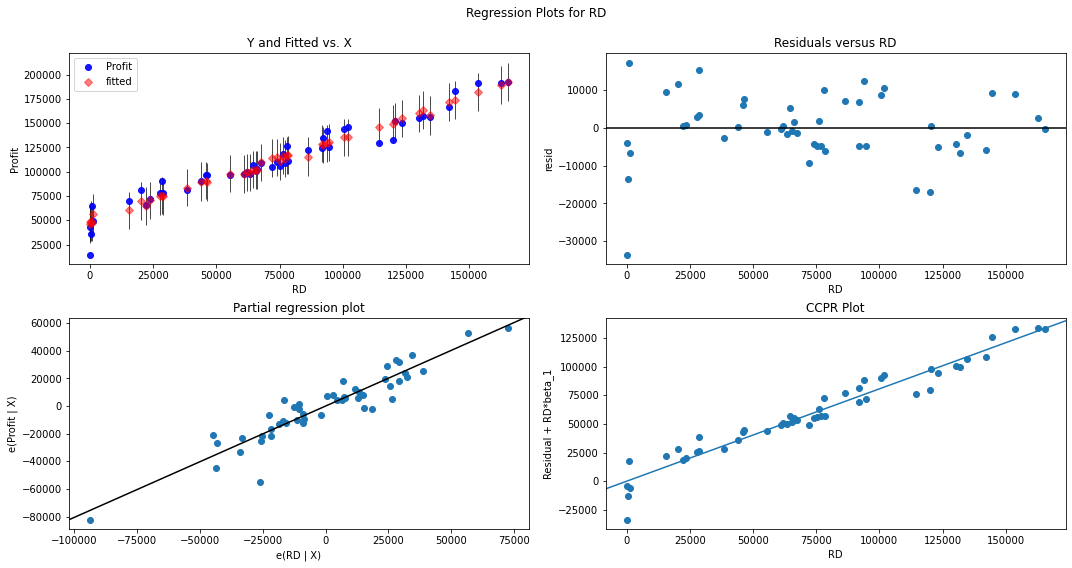

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

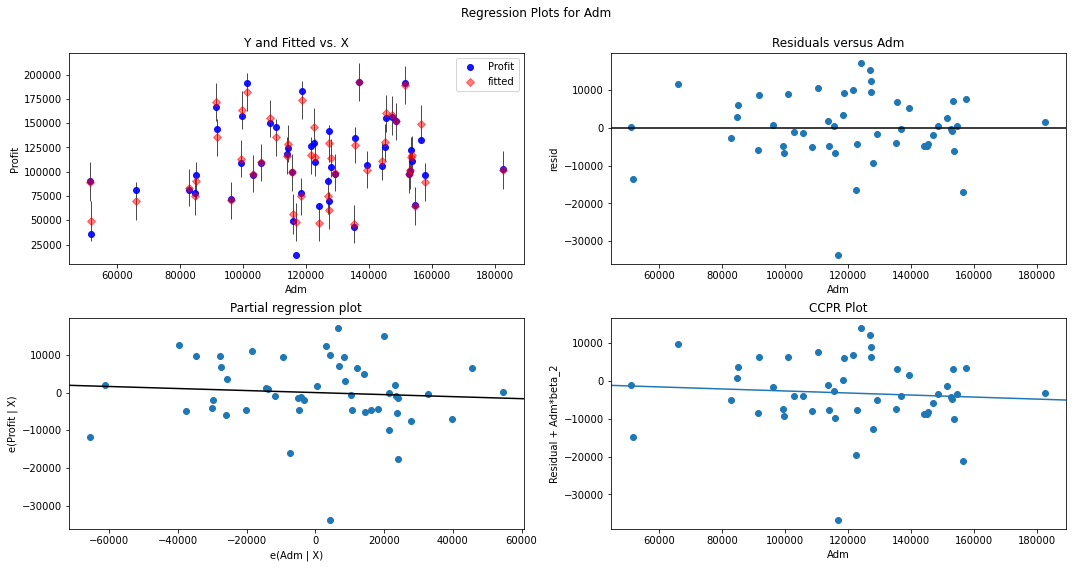

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Adm", fig=fig)
plt.show()

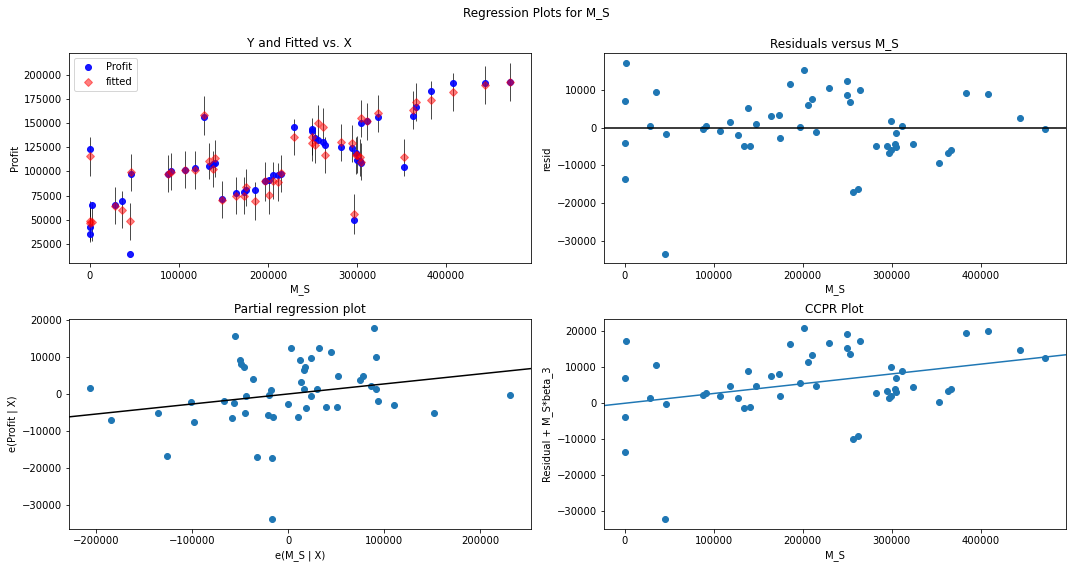

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "M_S", fig=fig)
plt.show()

In [28]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-29-f8c9922ee5bd>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data1)), np.round(c, 3))


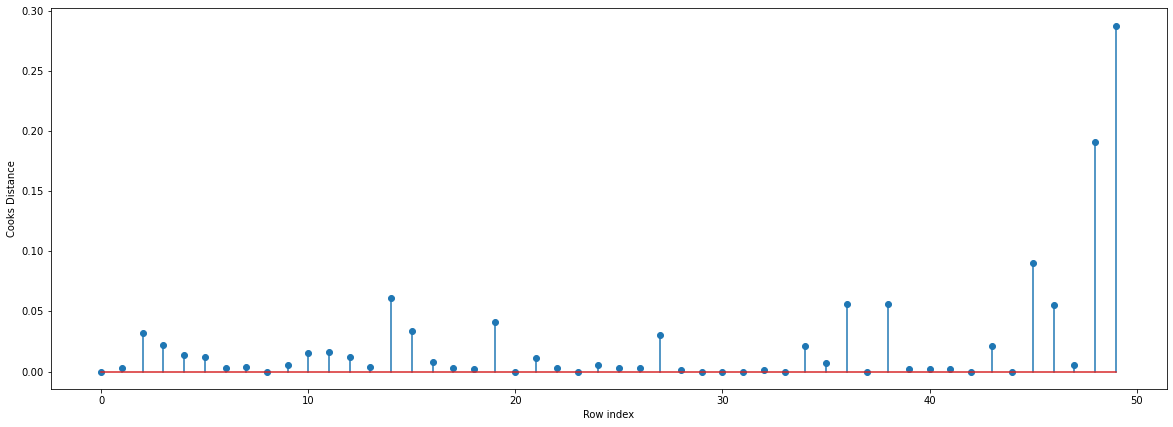

In [29]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

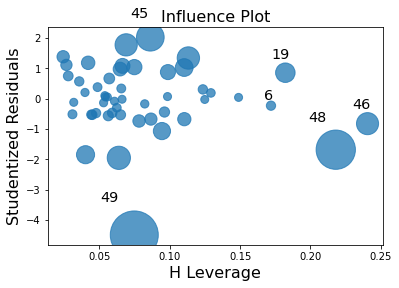

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [32]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [33]:
leverage_cutoff

0.36

In [34]:
data2=data1.drop(data1.index[[49,48,45]],axis=0).reset_index()

In [36]:
data3=data2.drop(['index'],axis=1)

In [38]:
final_ml_Adm= smf.ols('Profit~RD+Adm',data = data3).fit()

In [39]:
(final_ml_Adm.rsquared,final_ml_Adm.aic)

(0.962171549292245, 971.7555525307087)

In [40]:
final_ml_ms= smf.ols('Profit~RD+M_S',data = data3).fit()

In [41]:
(final_ml_ms.rsquared,final_ml_ms.aic)

(0.9622350924822813, 971.6765368418905)

Comparing above R-Square and AIC values, model 'final_ml_ms' has high R- square and low AIC value hence include variable 'M_S' so that multi collinearity problem would be resolved.

In [42]:
model_influence_ms = final_ml_ms.get_influence()
(c_V, _) = model_influence_ms.cooks_distance

<ipython-input-43-823ac6312d7e>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data3)),np.round(c_V,3));


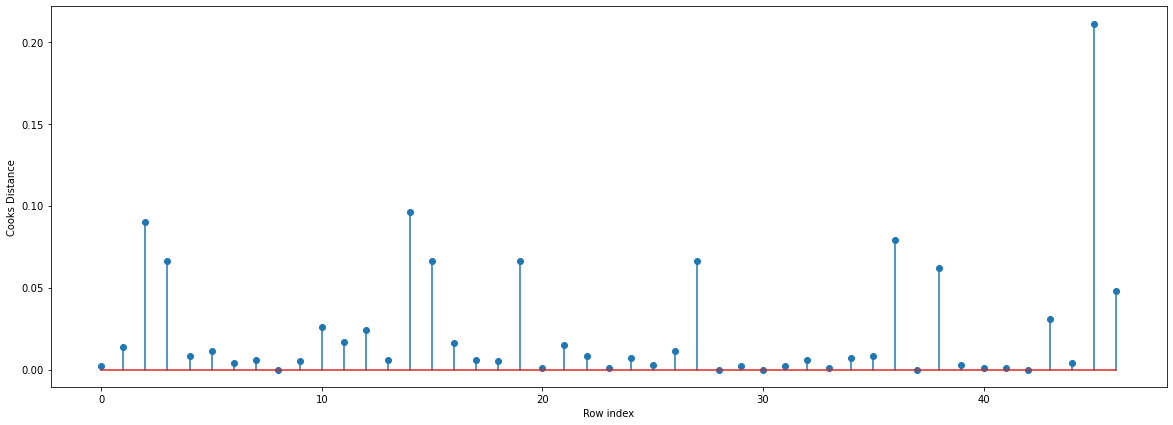

In [43]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [44]:
(np.argmax(c_V),np.max(c_V))

(45, 0.21071067743444724)

In [50]:
data4=data3.drop(data3.index[[45]],axis=0).reset_index()

In [52]:
data5=data4.drop(['index'],axis=1)

In [55]:
final_ml_s= smf.ols('Profit~RD+M_S',data = data5).fit()

In [57]:
model_influence_V = final_ml_s.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-58-5b66c4cc1bd5>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data5)),np.round(c_V,3));


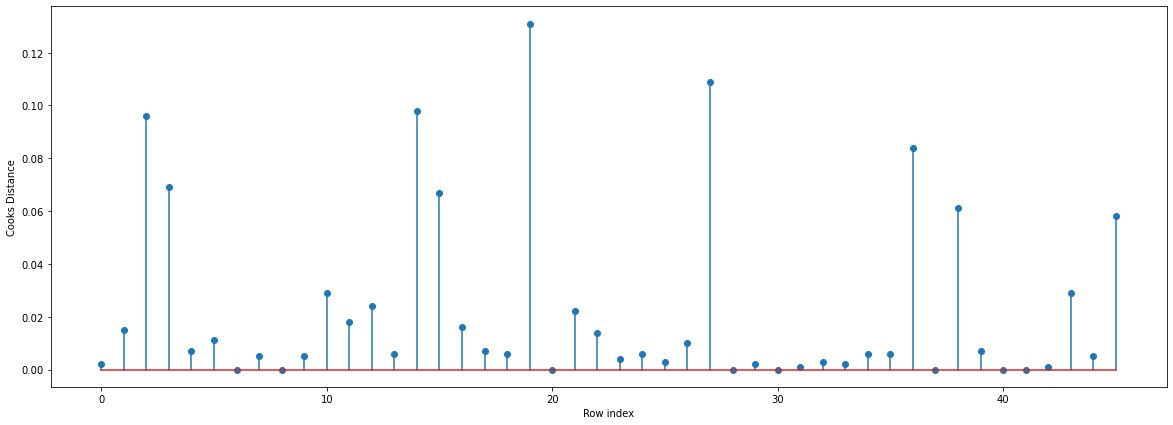

In [58]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [59]:
(np.argmax(c_V),np.max(c_V))

(19, 0.13115264468345686)

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [60]:
(final_ml_s.rsquared,final_ml_s.aic)

(0.9611920624974509, 949.7556721616616)

Predicting for new data

In [61]:
new_data=pd.DataFrame({'RD':120000,"M_S":200000,"Adm":95000},index=[1])

In [62]:
final_ml_s.predict(new_data)

1    147380.808412
dtype: float64

In [65]:
final_ml_s.predict(data5.iloc[0:5,])

0    190939.259587
1    187897.513206
2    179764.839157
3    172090.619113
4    169794.003740
dtype: float64

In [66]:
pred_y = final_ml_s.predict(data5)

In [67]:
pred_y

0     190939.259587
1     187897.513206
2     179764.839157
3     172090.619113
4     169794.003740
5     161998.022322
6     155822.684945
7     159448.145949
8     151695.113578
9     153559.258425
10    134823.336282
11    134612.128974
12    129504.376639
13    128198.411543
14    149316.432277
15    145432.038238
16    118112.754565
17    131245.891266
18    129494.937138
19    115170.333527
20    117993.362641
21    119634.166410
22    116460.197049
23    111659.746779
24    113052.616941
25    103667.762678
26    111536.624841
27    116789.123057
28    104015.267841
29    103295.016973
30    100023.829376
31     99277.664791
32     99508.800801
33     99466.980266
34     92525.202924
35     92031.040409
36     78852.115486
37     90274.453870
38     71965.157828
39     85365.729471
40     77928.376440
41     76990.281646
42     73221.700254
43     63177.520115
44     67934.328961
45     50293.151680
dtype: float64

In [77]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      46 non-null     float64
 1   Adm     46 non-null     float64
 2   M_S     46 non-null     float64
 3   State   46 non-null     object 
 4   Profit  46 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.9+ KB


# TOYOTA 

In [3]:
df = pd.read_csv('ToyotaCorolla.csv')

In [4]:
df.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [5]:
for col in df.columns:
    print(col)

Id
Model
Price
Age_08_04
Mfg_Month
Mfg_Year
KM
Fuel_Type
HP
Met_Color
Color
Automatic
cc
Doors
Cylinders
Gears
Quarterly_Tax
Weight
Mfr_Guarantee
BOVAG_Guarantee
Guarantee_Period
ABS
Airbag_1
Airbag_2
Airco
Automatic_airco
Boardcomputer
CD_Player
Central_Lock
Powered_Windows
Power_Steering
Radio
Mistlamps
Sport_Model
Backseat_Divider
Metallic_Rim
Radio_cassette
Tow_Bar


In [6]:
data_1=df.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [7]:
data_1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
data_1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [10]:
data_1[data_1.duplicated()].shape

(1, 9)

In [11]:
data_1.shape

(1436, 9)

In [12]:
 data_1[data_1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [13]:
data_2 = data_1.drop_duplicates()

In [14]:
data_2.shape

(1435, 9)

In [15]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [16]:
data_2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


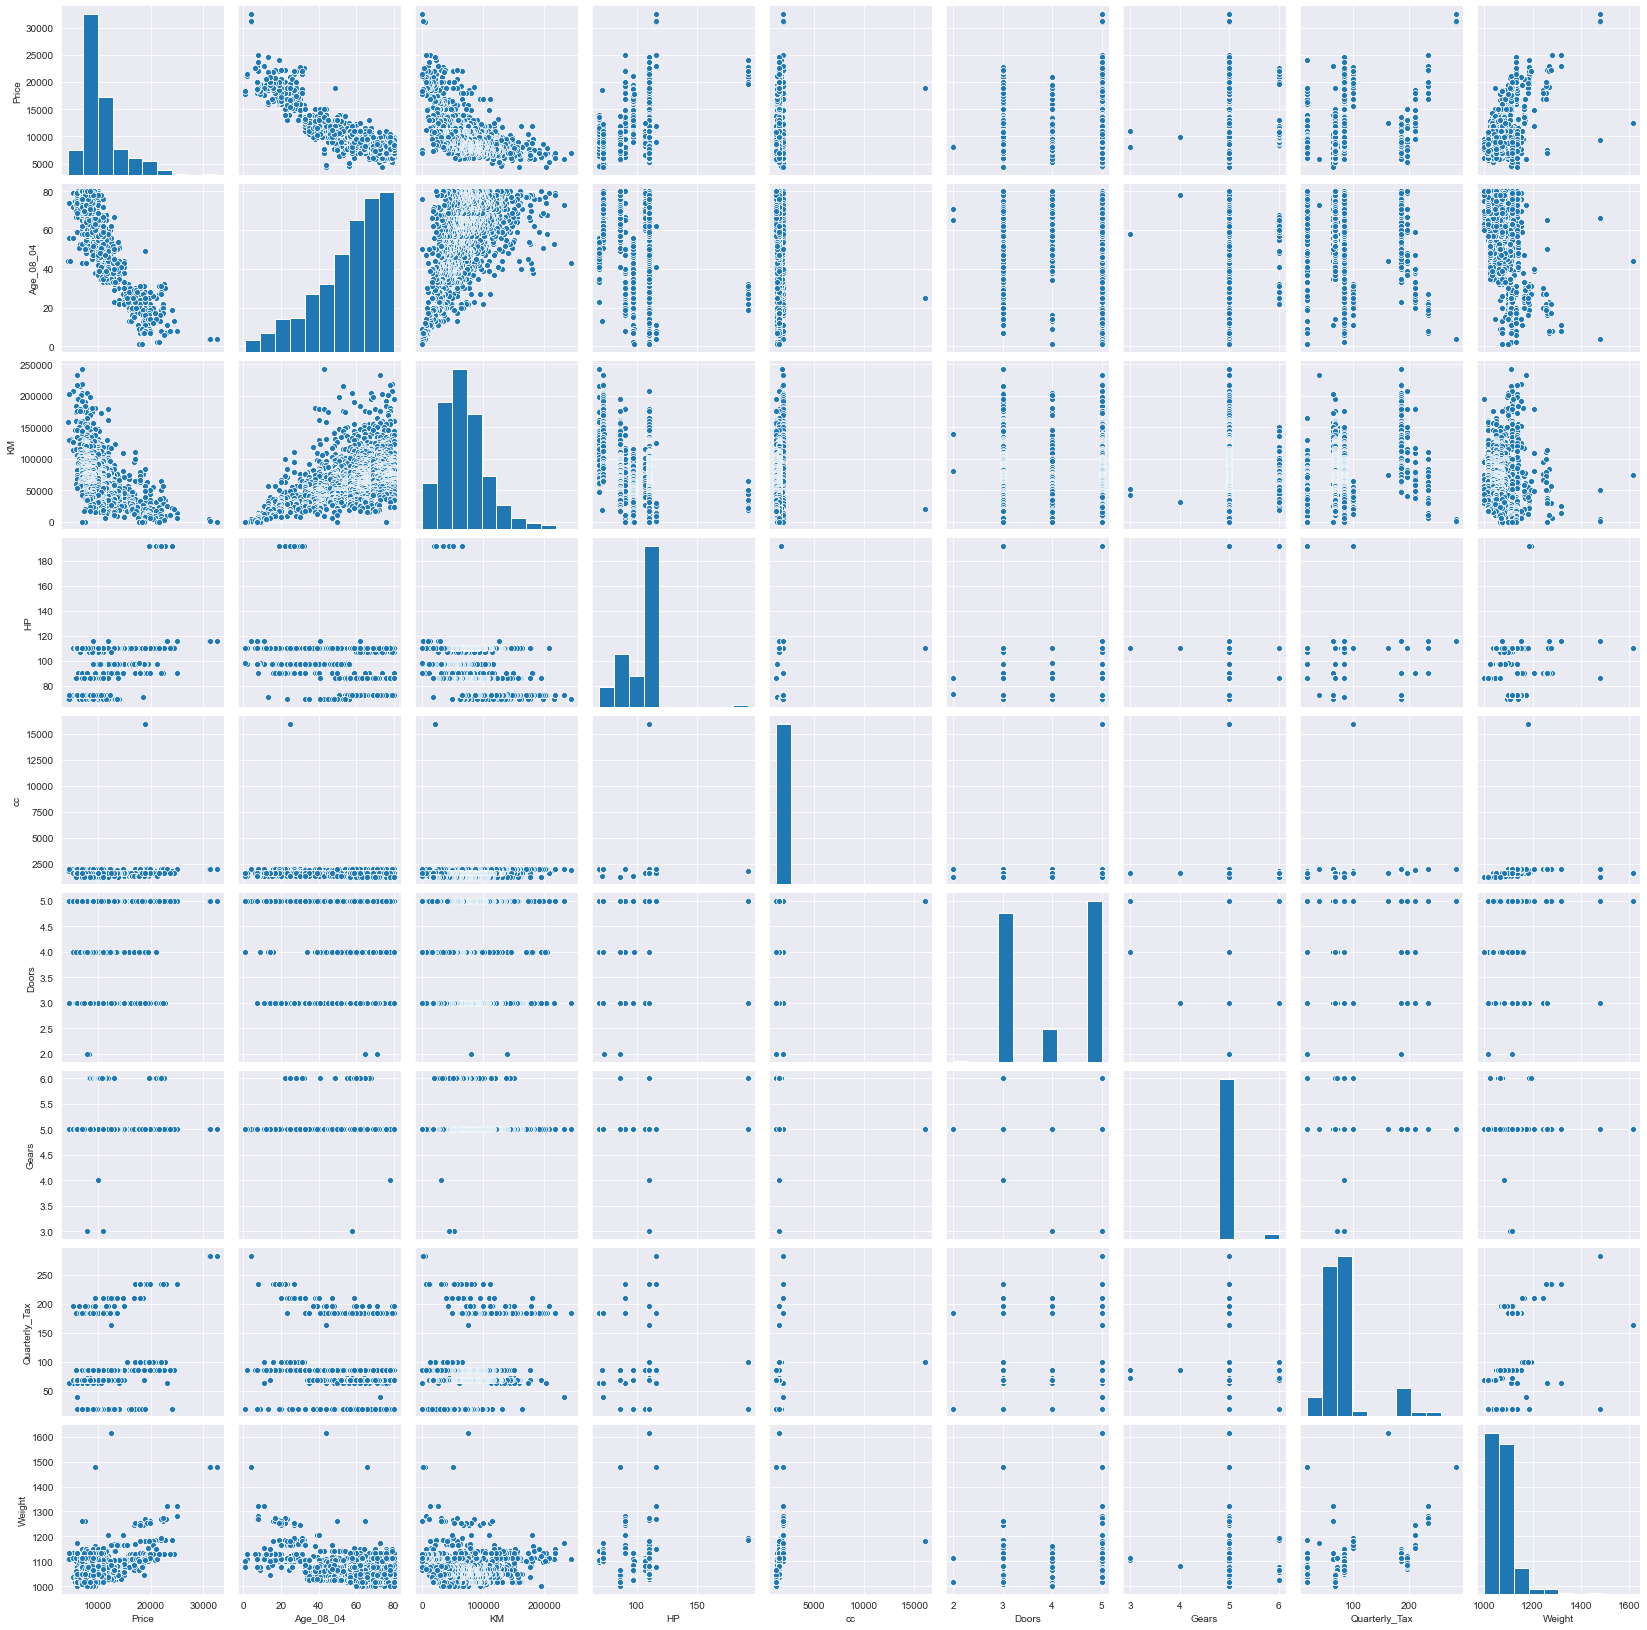

In [17]:
sns.set_style(style='darkgrid')
sns.pairplot(data_2)

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:16:51   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
for col in data_2.columns:
    print(col)

Price
Age_08_04
KM
HP
cc
Doors
Gears
Quarterly_Tax
Weight


In [20]:
ml_cc = smf.ols("Price~cc",data = data_2).fit()
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.29e-06
Time:                        16:16:52   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
ml_door = smf.ols("Price~Doors",data = data_2).fit()
ml_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.40e-12
Time:                        16:16:52   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
ml = smf.ols("Price~cc+Doors",data = data_2).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.55e-15
Time:                        16:16:52   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
print(model.tvalues, '\n', model.pvalues)    

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [24]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [28]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_2).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_2).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_2).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=data_2).fit().rsquared  
vif_cc  = 1/(1-rsq_cc)

rsq_Doors= smf.ols('Doors~Age_08_04+HP+cc+KM+Gears+Quarterly_Tax+Weight',data=data_2).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age_08_04+HP+cc+Doors+KM+Quarterly_Tax+Weight',data=data_2).fit().rsquared 
vif_Gears = 1/(1-rsq_Gears)

rsq_Qua_tax = smf.ols('Quarterly_Tax~Age_08_04+HP+cc+Doors+Gears+KM+Weight',data=data_2).fit().rsquared
vif_Qua_tax = 1/(1-rsq_Qua_tax)

rsq_weight = smf.ols('Weight~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+KM',data=data_2).fit().rsquared
vif_weight = 1/(1-rsq_weight)
# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Qua_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


In [29]:
res = model.resid

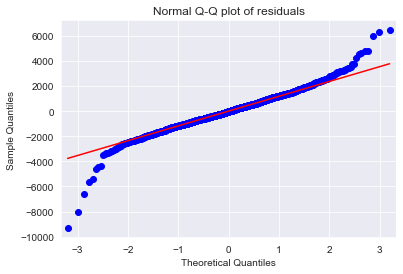

In [30]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [42]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [36]:
list(np.where(model.resid < -4000))

[array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)]

In [37]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

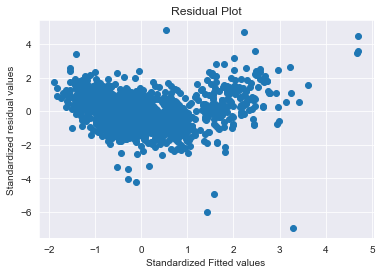

In [38]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [39]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-40-7518abc9e110>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data_2)), np.round(c, 3))


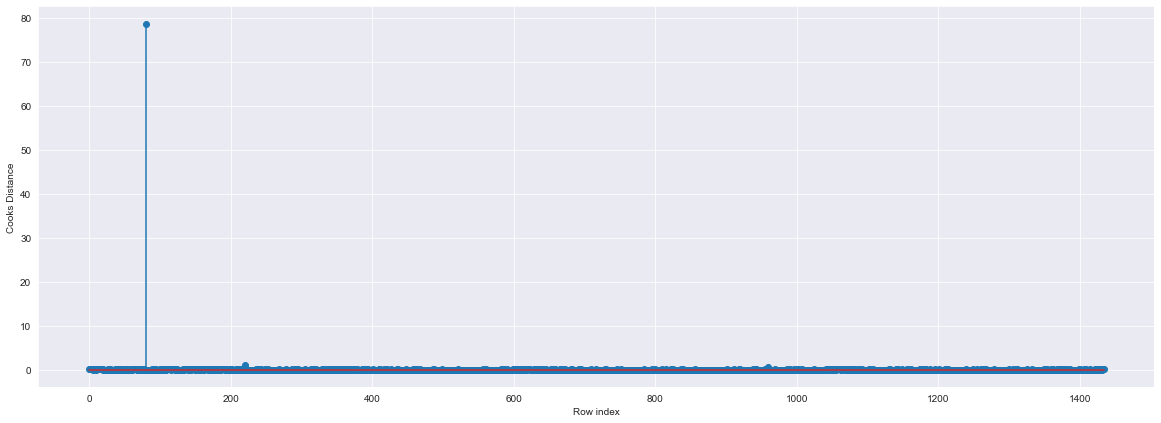

In [40]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

In [44]:
data_3=data_2.drop(data_2.index[[80]],axis=0).reset_index()

In [45]:
data_4=data_3.drop(['index'],axis=1)

In [60]:
final_ml= smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+KM+Weight',data = data_4).fit()

In [61]:
model_influence_ms = final_ml.get_influence()
(c_V, _) = model_influence_ms.cooks_distance

<ipython-input-62-c267b2675df0>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data_4)),np.round(c_V,3));


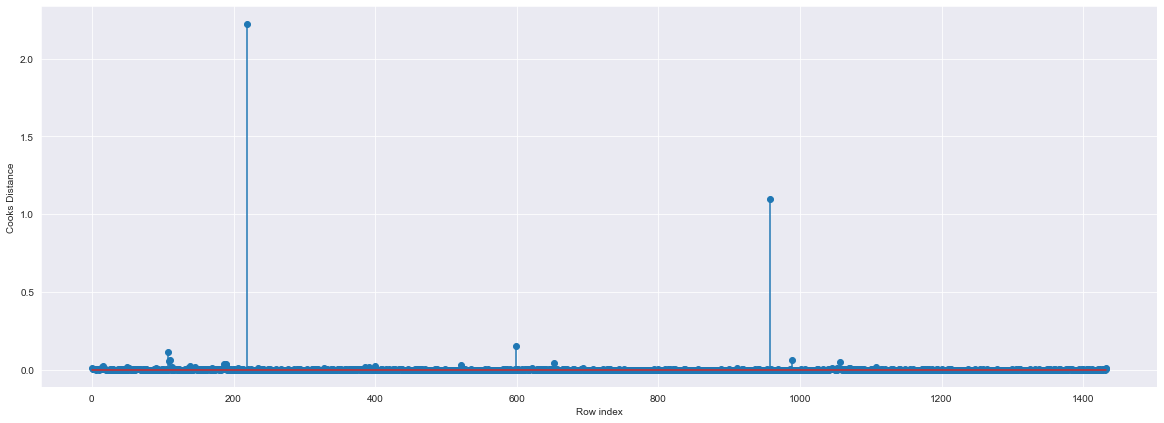

In [62]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [63]:
(np.argmax(c_V),np.max(c_V))

(219, 2.2253513655271813)

In [69]:
k = data_4.shape[1]
n = data_4.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [70]:
leverage_cutoff

0.02092050209205021

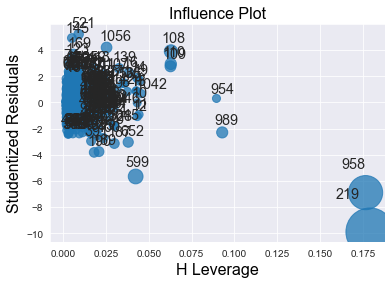

In [68]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml)
plt.show()

In [71]:
data_5=data_4.drop(data_4.index[[219,958,108,954,989,599]],axis=0).reset_index()

In [72]:
data_6=data_5.drop(['index'],axis=1)

In [73]:
final_ml= smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+KM+Weight',data = data_6).fit()

In [74]:
model_influence_ms = final_ml.get_influence()
(c_V, _) = model_influence_ms.cooks_distance

<ipython-input-76-a647267e1ebe>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data_6)),np.round(c_V,3));


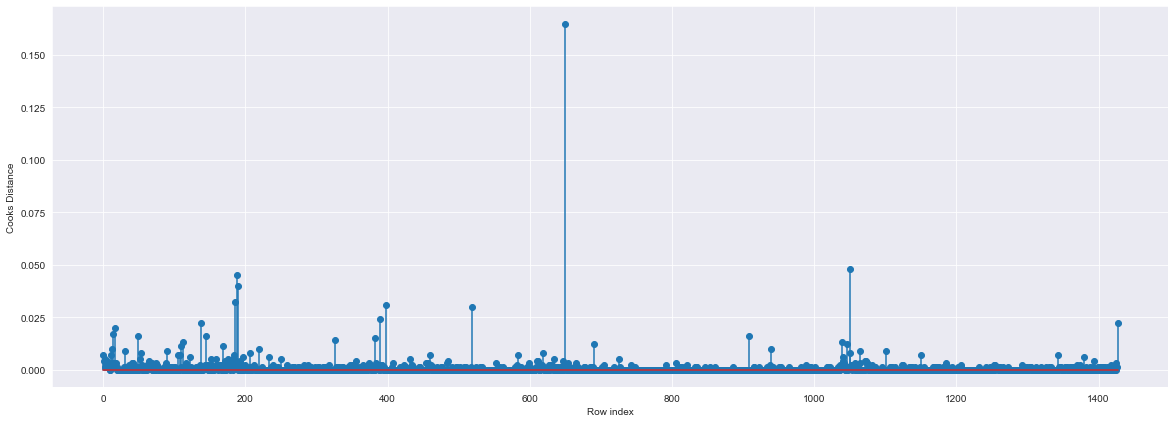

In [76]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_6)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [77]:
(np.argmax(c_V),np.max(c_V))

(649, 0.1651065252421942)

In [78]:
data_7=data_6.drop(data_6.index[[649]],axis=0).reset_index()

In [79]:
data_8=data_7.drop(['index'],axis=1)

In [80]:
final_ml= smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+KM+Weight',data = data_8).fit()

In [81]:
model_influence_ms = final_ml.get_influence()
(c_V, _) = model_influence_ms.cooks_distance

<ipython-input-82-0f211e1b7c83>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data_8)),np.round(c_V,3));


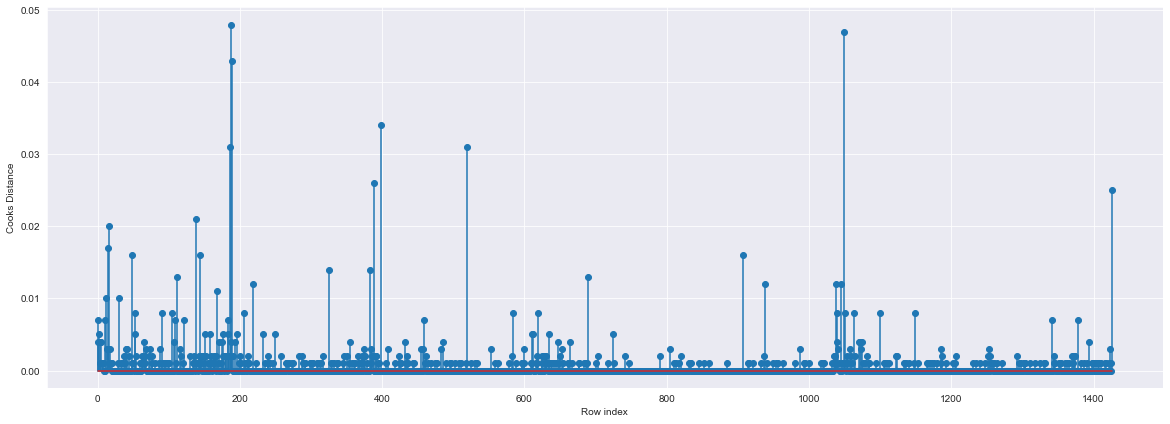

In [82]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_8)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [83]:
(np.argmax(c_V),np.max(c_V))

(188, 0.04834857999792968)

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [84]:
(final_ml.rsquared,final_ml.aic)

(0.8883663682019711, 24278.344895433893)

In [85]:
data_8.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Predict New Data

In [87]:
new_data=pd.DataFrame({"Age_08_04":22,"HP":110,"cc":2000,"Doors":2,"Gears":5,"Quarterly_Tax":190,"KM":50000,"Weight":1000},index=[1])

In [88]:
final_ml.predict(new_data)

1    11703.382093
dtype: float64

In [89]:
pred_y = final_ml.predict(data_8)

In [90]:
pred_y

0       16324.642225
1       15870.648162
2       16307.317024
3       15978.080441
4       15871.527817
            ...     
1422     9164.453505
1423     8531.278437
1424     8675.594617
1425     8786.951573
1426    10980.824088
Length: 1427, dtype: float64